In [1]:
import pandas as das
from datetime import datetime

In [27]:
file_name='Simple-X NY Dow Jones Index ETF (1679).csv'
df=das.read_csv(file_name, index_col='Date', parse_dates=['Date'])

In [28]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [29]:
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'],axis=1,inplace=True)

In [30]:
df.columns=['dow_jones_index']

In [31]:
df.dtypes

dow_jones_index    object
dtype: object

In [34]:
df

,dow_jones_index
Date,
2022-06-30,"36,480.0"
2022-06-29,"36,540.0"
2022-06-28,"36,910.0"
2022-06-27,"36,900.0"
2022-06-24,"36,130.0"
...,...
2012-01-11,"9,280.0"
2012-01-10,"9,310.0"
2012-01-06,"9,250.0"


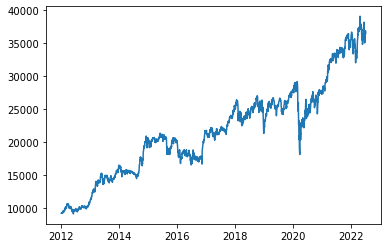

In [40]:
from  matplotlib import pyplot as plt
plt.plot(df)

In [36]:
df=df.astype('str')

In [37]:
for i in range(len(df.dow_jones_index)):
    df.iloc[i]=float(df.dow_jones_index[i].replace(',',''))

In [38]:
df=df.sort_values("Date")

In [39]:
df

,dow_jones_index
Date,
2012-01-04,9240.0
2012-01-05,9230.0
2012-01-06,9250.0
2012-01-10,9310.0
2012-01-11,9280.0
...,...
2022-06-24,36130.0
2022-06-27,36900.0
2022-06-28,36910.0


In [41]:
df=df.astype('float')

In [42]:
m= {1:31,2:28,3:31,4:30,5:31,6:30,7:31,8:31,9:30,10:31,11:30,12:31}

In [43]:
index=df.index
len_df=len(df.dow_jones_index)

In [44]:
index

DatetimeIndex(['2012-01-04', '2012-01-05', '2012-01-06', '2012-01-10',
               '2012-01-11', '2012-01-12', '2012-01-13', '2012-01-16',
               '2012-01-17', '2012-01-18',
               ...
               '2022-06-17', '2022-06-20', '2022-06-21', '2022-06-22',
               '2022-06-23', '2022-06-24', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', length=2438, freq=None)

In [45]:
for j in range (len_df-1):
    if index[j].month == index[j+1].month:
        if index[j+1].day!=index[j].day+1:
            for d in range(index[j].day+1,index[j+1].day):
                df.loc[datetime(index[j].year,index[j].month,d)]=(df.dow_jones_index[j]+df.dow_jones_index[j+1])/2
    if index[j].month != index[j+1].month:
        if index[j].day<m[index[j].month]:
            for d in range(index[j].day+1,m[index[j].month]+1):
                df.loc[datetime(index[j].year,index[j].month,d)]=(df.dow_jones_index[j]+df.dow_jones_index[j+1])/2
        if index[j+1].day!=1:
            for d in range(1,index[j+1].day):
                df.loc[datetime(index[j+1].year,index[j+1].month,d)]=(df.dow_jones_index[j]+df.dow_jones_index[j+1])/2

In [46]:
df=df.sort_values("Date")

In [47]:
df

,dow_jones_index
Date,
2012-01-04,9240.0
2012-01-05,9230.0
2012-01-06,9250.0
2012-01-07,9280.0
2012-01-08,9280.0
...,...
2022-06-26,36515.0
2022-06-27,36900.0
2022-06-28,36910.0


In [48]:
df.loc[datetime(2020,2,29)]=(df.loc[datetime(2020,2,28)]+df.loc[datetime(2020,3,1)])/2

In [162]:
df.loc[datetime(2016,2,29)]=(df.loc[datetime(2016,2,28)]+df.loc[datetime(2016,3,1)])/2

In [49]:
df=df.sort_values("Date")

In [50]:
df.to_csv(file_name)